In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [87]:
five_mm_calibration = pd.read_csv("/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/SCAN Calibration Experiment/2-20-24/5mmOPL.fp", sep='\t', header=1).drop('Status_0', axis=1)
thirtyfive_mm_calibration = pd.read_csv("/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/SCAN Calibration Experiment/2-20-24/35mmOPL.fp", sep='\t', header=1).drop('Status_0', axis=1)

In [88]:
def fit_linear_function(linear_range, x, y):
    coeff = np.polyfit(linear_range[x], linear_range[y], 1)
    r2 = np.corrcoef(linear_range[x], linear_range[y])[0,1]**2
    return coeff, r2

def plot_linear_fit(data, linear_range, x, y, text_start_x, text_start_y, text_y_spacing, ax):
    coeff, r2 = fit_linear_function(linear_range, x, y)
    vals= np.polyval(coeff, data[x])
    ax.plot(data[x], vals, color='b')
    ax.text(text_start_x, text_start_y, 'Slope: %.2f' % (coeff[0]))
    ax.text(text_start_x, text_start_y - text_y_spacing, 'Intercept: %.2f' % (coeff[1]))
    ax.text(text_start_x, text_start_y - 2*text_y_spacing, 'R2: %.4f' % (r2))
    return coeff, r2

# Single Wavelength Calibration Curves

In [89]:
additions=  pd.read_excel("/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/SCAN Calibration Experiment/CalibrationAdditions_v2.xlsx")
additions['Concentration (uM)']

0       0.000000
1       0.100000
2       0.200000
3       0.300000
4       0.400000
5       0.500000
6       0.599999
7       0.699999
8       0.799999
9       0.899998
10      0.999998
11      1.999992
12      2.999982
13      3.999968
14      4.999950
15      5.999928
16      6.999902
17      7.999872
18      8.999838
19      9.999800
20     10.999758
21     11.999712
22     12.999662
23     13.999608
24     23.999280
25     33.998912
26     43.998504
27     53.998056
28     63.997568
29     73.997040
30     83.996472
31     93.995864
32    103.995216
33    193.986537
34    293.974058
35    393.957580
36    493.937104
Name: Concentration (uM), dtype: float64

In [90]:
five_mm_calibration['Concentration (uM)'] = additions['Concentration (uM)']
thirtyfive_mm_calibration['Concentration (uM)'] = additions['Concentration (uM)']
thirtyfive_mm_calibration.drop(32, inplace=True) # this particular reading was bad, must've forgotten addition or something
five_mm_calibration.drop(32, inplace=True)
thirtyfive_mm_calibration

,Date/Time,200.00,202.50,205.00,207.50,210.00,212.50,215.00,217.50,220.00,...,730.00,732.50,735.00,737.50,740.00,742.50,745.00,747.50,750.00,Concentration (uM)
0,2024.02.20 15:45:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.223,...,-0.066,-0.062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1,2024.02.20 15:46:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.164,...,-0.125,-0.117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100000
2,2024.02.20 15:47:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.105,...,-0.105,-0.094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000
3,2024.02.20 15:48:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.148,...,-0.156,-0.156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000
4,2024.02.20 15:49:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.031,...,-0.109,-0.117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400000
5,2024.02.20 15:50:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.023,...,-0.105,-0.105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
6,2024.02.20 15:51:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.090,...,-0.121,-0.141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.599999
7,2024.02.20 15:52:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.133,...,-0.023,-0.023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.699999
8,2024.02.20 15:53:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.164,...,-0.043,-0.051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.799999
9,2024.02.20 15:54:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.133,...,-0.133,-0.137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.899998


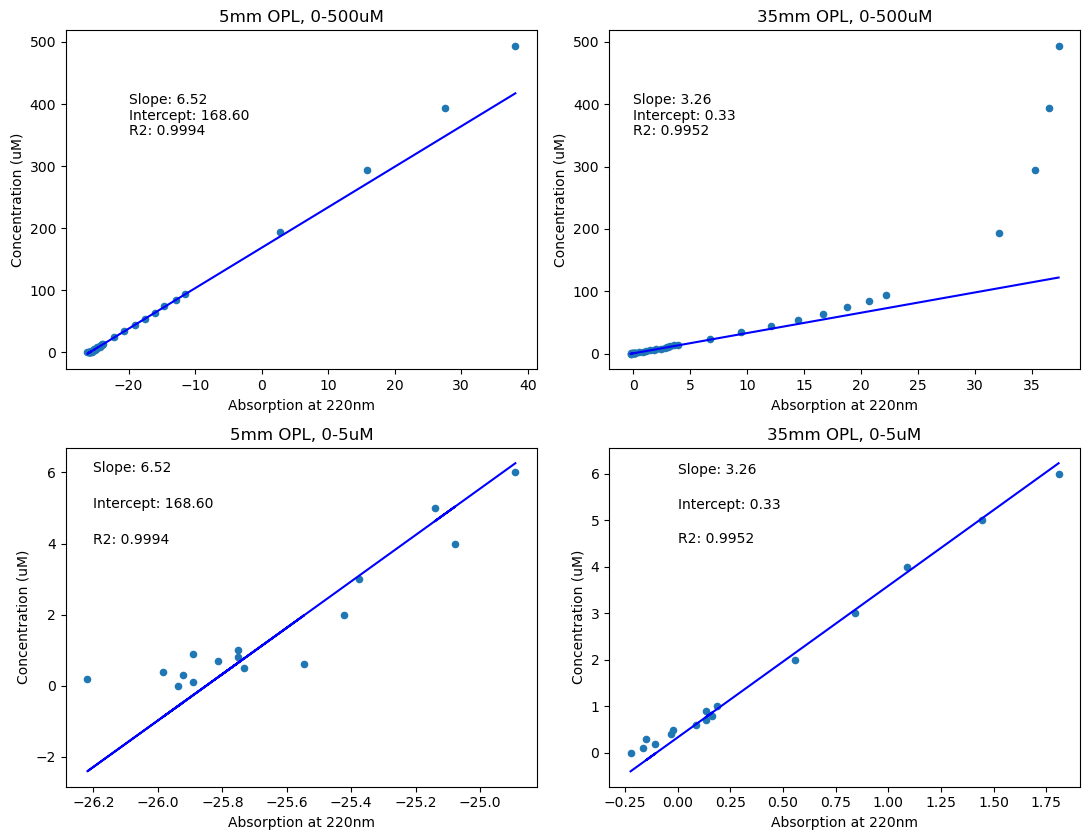

In [91]:
fig, ax = plt.subplots(figsize=(11,8.5), ncols=2, nrows=2)
five_mm_calibration.plot(y="Concentration (uM)", x='220.00', kind='scatter', ax=ax[0,0], title= "5mm OPL, 0-500uM")
thirtyfive_mm_calibration.plot(y="Concentration (uM)", x='220.00', kind='scatter', ax=ax[0, 1], title = "35mm OPL, 0-500uM")
plot_linear_fit(five_mm_calibration, five_mm_calibration.loc[11:30], '220.00', 'Concentration (uM)', -20, 400, 25, ax[0,0])
plot_linear_fit(thirtyfive_mm_calibration, thirtyfive_mm_calibration.loc[5:20], '220.00', 'Concentration (uM)', 0, 400, 25, ax[0,1])


five_mm_calibration.loc[0:15].plot(y="Concentration (uM)", x='220.00', kind='scatter', ax=ax[1,0], title= "5mm OPL, 0-5uM")
thirtyfive_mm_calibration.loc[0:15].plot(y="Concentration (uM)", x='220.00', kind='scatter', ax=ax[1, 1], title = "35mm OPL, 0-5uM")

coeff_5mm, r2_5mm = plot_linear_fit(five_mm_calibration.loc[0:15], five_mm_calibration.loc[11:30], '220.00', 'Concentration (uM)', -26.2, 6, 1, ax[1,0])
coeff_35mm, r2_5mm =plot_linear_fit(thirtyfive_mm_calibration.loc[0:15], thirtyfive_mm_calibration.loc[5:20], '220.00', 'Concentration (uM)', 0, 6, .75, ax[1,1])

for ax in ax.flatten():
    ax.set_xlabel("Absorption at 220nm")
    
fig.tight_layout()

# 5mm and 35mm LOD

In [92]:
thirtyfive_mm_LOD = pd.read_csv("/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/SCAN Calibration Experiment/2-20-24/35mmOPL_LOD.fp", sep='\t', header=1).drop('Status_0', axis=1)
five_mm_LOD = pd.read_csv("/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/SCAN Calibration Experiment/2-20-24/5mmOPL_LOD.fp", sep='\t', header=1).drop('Status_0', axis=1)

thirtyfive_mm_LOD['Nitrate Concentration (uM)'] = np.polyval(coeff_35mm, thirtyfive_mm_LOD['220.00'])
five_mm_LOD['Nitrate Concentration (uM)'] = np.polyval(coeff_5mm, five_mm_LOD['220.00'])


thirtyfive_mm_LOD['Date/Time'] = pd.to_datetime(thirtyfive_mm_LOD['Date/Time'])
thirtyfive_mm_LOD.set_index('Date/Time', inplace=True)
five_mm_LOD['Date/Time'] = pd.to_datetime(five_mm_LOD['Date/Time'])
five_mm_LOD.set_index('Date/Time', inplace=True)

thirtyfive_mm_LOD = thirtyfive_mm_LOD['2024-02-22 11:20':'2024-02-22 11:29']
five_mm_LOD = five_mm_LOD['2024-02-22 11:39': '2024-02-22 11:48']
thirtyfive_mm_LOD

,200.00,202.50,205.00,207.50,210.00,212.50,215.00,217.50,220.00,222.50,...,730.00,732.50,735.00,737.50,740.00,742.50,745.00,747.50,750.00,Nitrate Concentration (uM)
Date/Time,,,,,,,,,,,,,,,,,,,,,
2024-02-22 11:20:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965,0.762,...,0.039,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.474400
2024-02-22 11:20:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.086,0.867,...,0.008,0.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.868623
2024-02-22 11:21:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.012,0.801,...,-0.008,-0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.627528
2024-02-22 11:21:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.090,0.863,...,0.008,-0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.881655
2024-02-22 11:22:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.074,0.863,...,0.066,0.062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.829526
2024-02-22 11:22:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.973,0.781,...,-0.023,-0.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.500464
2024-02-22 11:23:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.062,0.852,...,0.004,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.790430
2024-02-22 11:23:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.035,0.828,...,0.047,0.051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.702463
2024-02-22 11:24:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.027,0.844,...,0.008,0.035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.676398


In [93]:
thirtyfive_mm_lod_results = pd.DataFrame([('Expected', 1), ('Mean',thirtyfive_mm_LOD['Nitrate Concentration (uM)'].mean()), ('Std', thirtyfive_mm_LOD['Nitrate Concentration (uM)'].std()), ('LOD', thirtyfive_mm_LOD['Nitrate Concentration (uM)'].std()*stats.t.ppf(.99,thirtyfive_mm_LOD.shape[0]-1)), ('LOQ',thirtyfive_mm_LOD['Nitrate Concentration (uM)'].std()*10)])
thirtyfive_mm_lod_results.set_index(0, inplace=True)
thirtyfive_mm_lod_results.rename({1:'Nitrate Concentration (uM)'}, axis=1,inplace=True)
thirtyfive_mm_lod_results

,Nitrate Concentration (uM)
0,
Expected,1.000000
Mean,3.525225
Std,0.222411
LOD,0.564810
LOQ,2.224113


In [94]:
five_mm_lod_results = pd.DataFrame([('Expected', 1), ('Mean',five_mm_LOD['Nitrate Concentration (uM)'].mean()), ('Std', five_mm_LOD['Nitrate Concentration (uM)'].std()), ('LOD', five_mm_LOD['Nitrate Concentration (uM)'].std()*stats.t.ppf(.99,five_mm_LOD.shape[0]-1)), ('LOQ',five_mm_LOD['Nitrate Concentration (uM)'].std()*10)])
five_mm_lod_results.set_index(0, inplace=True)
five_mm_lod_results.rename({1:'Nitrate Concentration (uM)'}, axis=1,inplace=True)
five_mm_lod_results

,Nitrate Concentration (uM)
0,
Expected,1.000000
Mean,6.266065
Std,0.617424
LOD,1.567938
LOQ,6.174239


# Second Derivative Calibrations

In [95]:
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from scan import scan_helpers
from scan import no3_calibrations

In [96]:
five_mm_calibration.set_index("Concentration (uM)", inplace=True)

In [97]:
five_mm_calibration.index

Float64Index([                0.0, 0.09999998000000399,   0.199999920000032,
              0.29999982000010794,  0.3999996800002559,  0.4999995000004999,
               0.5999992800008639,  0.6999990200013718,  0.7999987200020476,
               0.8999983800029158,  0.9999980000039999,  1.9999920000319993,
                2.999982000107998,   3.999968000255997,   4.999950000499994,
                5.999928000863988,   6.999902001371979,   7.999872002047964,
                8.999838002915945,   9.999800003999917,  10.999758005323878,
               11.999712006911828,  12.999662008787762,  13.999608010975681,
               23.999280021599336,   33.99891203481486,   43.99850405086224,
                53.99805606998144,   63.99756809241243,   73.99704011839519,
                 83.9964721481697,   93.99586418197589,  193.98653688856515,
                293.9740582309919,  393.95758049646696,   493.9371039249049],
             dtype='float64', name='Concentration (uM)')

Text(0.5, 1.0, 'Savitsky-Golay Smoothed Spectra vs Raw at 10 uM NO3')

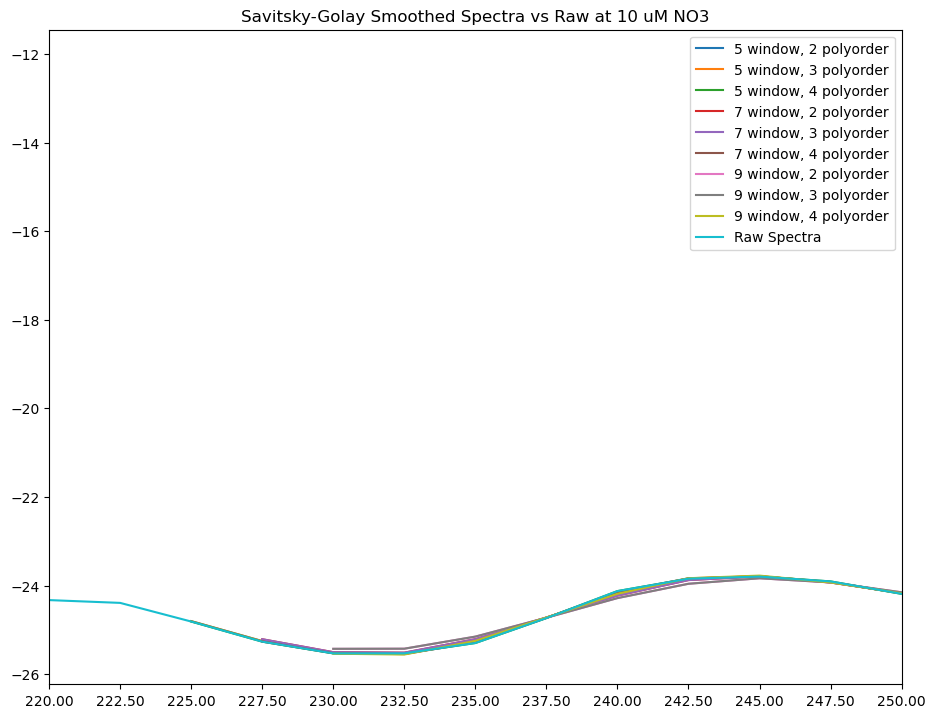

In [98]:
fig, ax = plt.subplots(figsize=(11,8.5))

for window_size in list([5,7,9]):
    for poly_order in range(2,5):
        df_2d = five_mm_calibration.drop('Date/Time', axis=1).transform(lambda x: savgol_filter(x, window_size,poly_order),axis=1)
        ax.plot(df_2d.columns, df_2d.loc[9.999800003999917], label = "%i window, %i polyorder"  % (window_size, poly_order))

ax.plot(five_mm_calibration.drop('Date/Time', axis=1).columns, five_mm_calibration.drop('Date/Time', axis=1).loc[9.999800003999917], label='Raw Spectra')
ax.legend()
ax.set_xlim("220.00","250.00")
ax.set_title('Savitsky-Golay Smoothed Spectra vs Raw at 10 uM NO3')

- no real obvious difference except for range at the low end. how about 2nd derivative?

Text(0.5, 0.98, '5mm Pathlength')

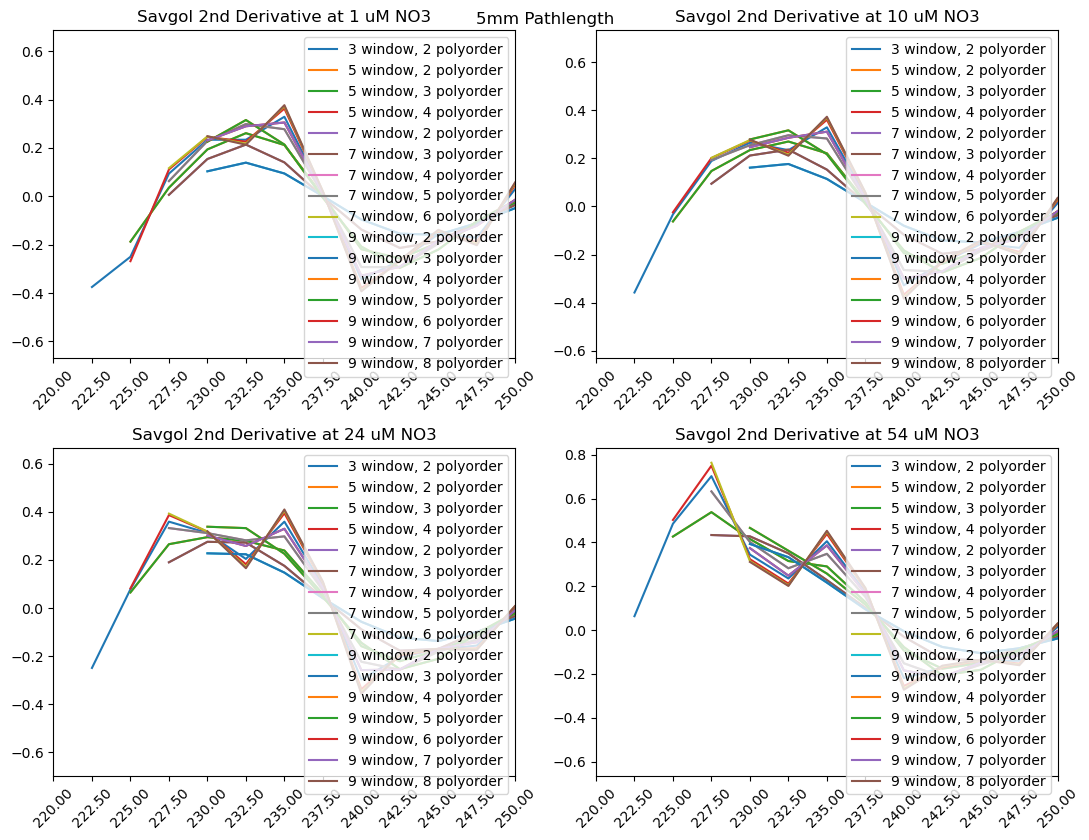

In [99]:
fig, ax = plt.subplots(ncols = 2, nrows=2, figsize=(11,8.5))

for window_size in list([3,5,7,9]):
    for poly_order in range(2,window_size):

        df_2d = five_mm_calibration.drop('Date/Time', axis=1).transform(lambda x: savgol_filter(x, window_size,poly_order,deriv=2),axis=1)
        ax[0,0].plot(df_2d.columns, df_2d.loc[0.9999980000039999], label = "%i window, %i polyorder"  % (window_size, poly_order))

#ax.plot(five_mm_calibration.drop('Date/Time', axis=1).columns, five_mm_calibration.drop('Date/Time', axis=1).loc[9.999800003999917], label='Raw Spectra')
ax[0,0].legend(loc='upper right')
ax[0,0].set_xlim("220.00","250.00")
ax[0,0].set_title('Savgol 2nd Derivative at 1 uM NO3')

for window_size in list([3,5,7,9]):
    for poly_order in range(2,window_size):

        df_2d = five_mm_calibration.drop('Date/Time', axis=1).transform(lambda x: savgol_filter(x, window_size,poly_order,deriv=2),axis=1)
        ax[0,1].plot(df_2d.columns, df_2d.loc[9.999800003999917], label = "%i window, %i polyorder"  % (window_size, poly_order))

#ax.plot(five_mm_calibration.drop('Date/Time', axis=1).columns, five_mm_calibration.drop('Date/Time', axis=1).loc[9.999800003999917], label='Raw Spectra')
ax[0,1].legend(loc='upper right')
ax[0,1].set_xlim("220.00","250.00")
ax[0,1].set_title('Savgol 2nd Derivative at 10 uM NO3')

for window_size in list([3,5,7,9]):
    for poly_order in range(2,window_size):

        df_2d = five_mm_calibration.drop('Date/Time', axis=1).transform(lambda x: savgol_filter(x, window_size,poly_order,deriv=2),axis=1)
        ax[1,0].plot(df_2d.columns, df_2d.loc[23.999280021599336], label = "%i window, %i polyorder"  % (window_size, poly_order))

#ax.plot(five_mm_calibration.drop('Date/Time', axis=1).columns, five_mm_calibration.drop('Date/Time', axis=1).loc[9.999800003999917], label='Raw Spectra')
ax[1,0].legend(loc='upper right')
ax[1,0].set_xlim("220.00","250.00")
ax[1,0].set_title('Savgol 2nd Derivative at 24 uM NO3')

for window_size in list([3,5,7,9]):
    for poly_order in range(2,window_size):

        df_2d = five_mm_calibration.drop('Date/Time', axis=1).transform(lambda x: savgol_filter(x, window_size,poly_order,deriv=2),axis=1)
        ax[1,1].plot(df_2d.columns, df_2d.loc[53.99805606998144], label = "%i window, %i polyorder"  % (window_size, poly_order))

#ax.plot(five_mm_calibration.drop('Date/Time', axis=1).columns, five_mm_calibration.drop('Date/Time', axis=1).loc[9.999800003999917], label='Raw Spectra')
ax[1,1].legend(loc='upper right')
ax[1,1].set_xlim("220.00","250.00")
ax[1,1].set_title('Savgol 2nd Derivative at 54 uM NO3')

for axs in ax.flatten():
    axs.tick_params(axis='x', labelrotation=45)

fig.tight_layout()
fig.suptitle('5mm Pathlength')

- pretty clearly the peak is at 227.5 nm, and isn't very visible at low concentrations (10uM and below)
- 

In [100]:
thirtyfive_mm_calibration.set_index('Concentration (uM)', inplace=True)

Text(0.5, 0.98, '35mm Pathlength')

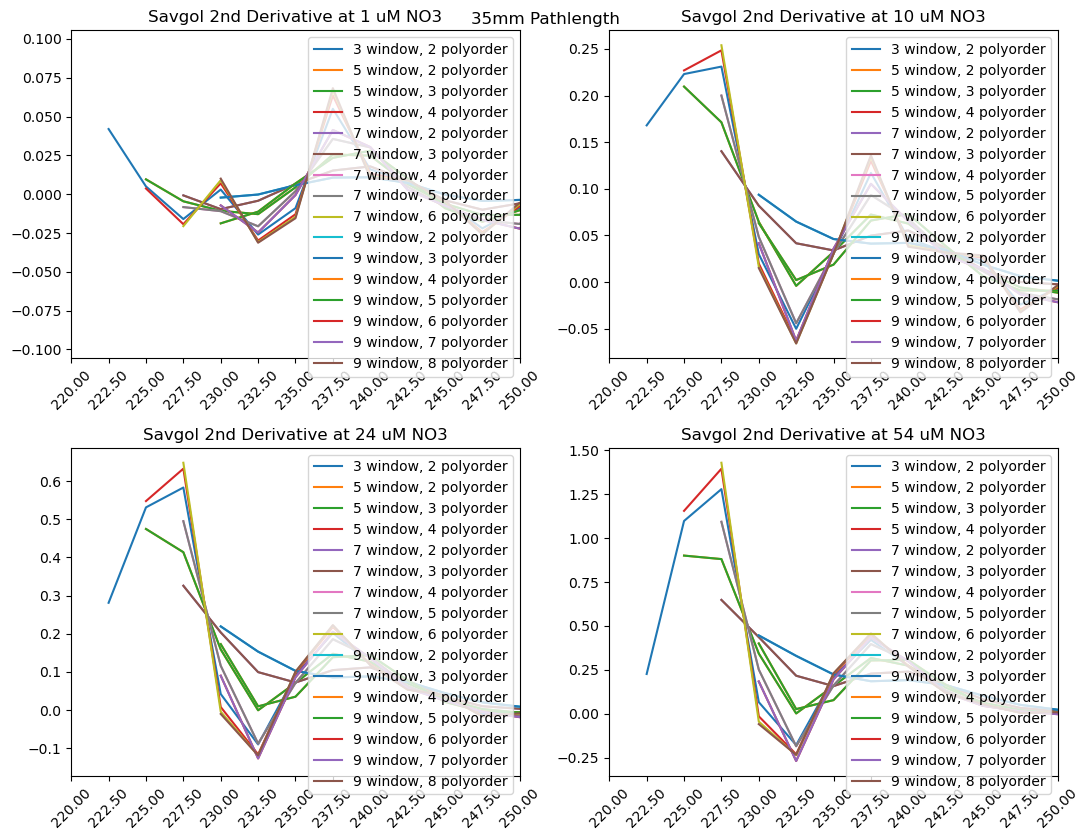

In [101]:
fig, ax = plt.subplots(ncols = 2, nrows=2, figsize=(11,8.5))
#thirtyfive_mm_calibration.set_index('Concentration (uM)', inplace=True)
for window_size in list([3,5,7,9]):
    for poly_order in range(2,window_size):

        df_2d = thirtyfive_mm_calibration.drop('Date/Time', axis=1).transform(lambda x: savgol_filter(x, window_size,poly_order,deriv=2),axis=1)
        ax[0,0].plot(df_2d.columns, df_2d.loc[0.9999980000039999], label = "%i window, %i polyorder"  % (window_size, poly_order))

#ax.plot(five_mm_calibration.drop('Date/Time', axis=1).columns, five_mm_calibration.drop('Date/Time', axis=1).loc[9.999800003999917], label='Raw Spectra')
ax[0,0].legend(loc='upper right')
ax[0,0].set_xlim("220.00","250.00")
ax[0,0].set_title('Savgol 2nd Derivative at 1 uM NO3')

for window_size in list([3,5,7,9]):
    for poly_order in range(2,window_size):

        df_2d = thirtyfive_mm_calibration.drop('Date/Time', axis=1).transform(lambda x: savgol_filter(x, window_size,poly_order,deriv=2),axis=1)
        ax[0,1].plot(df_2d.columns, df_2d.loc[9.999800003999917], label = "%i window, %i polyorder"  % (window_size, poly_order))

#ax.plot(five_mm_calibration.drop('Date/Time', axis=1).columns, five_mm_calibration.drop('Date/Time', axis=1).loc[9.999800003999917], label='Raw Spectra')
ax[0,1].legend(loc='upper right')
ax[0,1].set_xlim("220.00","250.00")
ax[0,1].set_title('Savgol 2nd Derivative at 10 uM NO3')

for window_size in list([3,5,7,9]):
    for poly_order in range(2,window_size):

        df_2d = thirtyfive_mm_calibration.drop('Date/Time', axis=1).transform(lambda x: savgol_filter(x, window_size,poly_order,deriv=2),axis=1)
        ax[1,0].plot(df_2d.columns, df_2d.loc[23.999280021599336], label = "%i window, %i polyorder"  % (window_size, poly_order))

#ax.plot(five_mm_calibration.drop('Date/Time', axis=1).columns, five_mm_calibration.drop('Date/Time', axis=1).loc[9.999800003999917], label='Raw Spectra')
ax[1,0].legend(loc='upper right')
ax[1,0].set_xlim("220.00","250.00")
ax[1,0].set_title('Savgol 2nd Derivative at 24 uM NO3')

for window_size in list([3,5,7,9]):
    for poly_order in range(2,window_size):
        df_2d = thirtyfive_mm_calibration.drop('Date/Time', axis=1).transform(lambda x: savgol_filter(x, window_size,poly_order,deriv=2),axis=1)
        ax[1,1].plot(df_2d.columns, df_2d.loc[53.99805606998144], label = "%i window, %i polyorder"  % (window_size, poly_order))

#ax.plot(five_mm_calibration.drop('Date/Time', axis=1).columns, five_mm_calibration.drop('Date/Time', axis=1).loc[9.999800003999917], label='Raw Spectra')
ax[1,1].legend(loc='upper right')
ax[1,1].set_xlim("220.00","250.00")
ax[1,1].set_title('Savgol 2nd Derivative at 54 uM NO3')

for axs in ax.flatten():
    axs.tick_params(axis='x', labelrotation=45)

fig.tight_layout()
fig.suptitle("35mm Pathlength")

- wow, 35mm has a much stronger response than 5mm in second derivative - not sure if thats a function of pathlength or the reference spectra being set right
- as with 5mm, the greatest response comes from the least smoothign (7 window,6 polyorder), (5 window, 4 polyorder), (3 window, 2 polyorder). next is to see which gives best LOD and r2

## Checking fits

### 35mm

In [102]:
thirtyfive_mm_calibration = no3_calibrations.second_derivative(thirtyfive_mm_calibration, output_calibrated=False, window_size=7, poly_order=6, prefix='7_6_')
thirtyfive_mm_calibration = no3_calibrations.second_derivative(thirtyfive_mm_calibration, output_calibrated=False, window_size=5, poly_order=4, prefix='5_4_')
thirtyfive_mm_calibration = no3_calibrations.second_derivative(thirtyfive_mm_calibration, output_calibrated=False, window_size=3, poly_order=2, prefix='3_2_')
thirtyfive_mm_calibration = no3_calibrations.second_derivative(thirtyfive_mm_calibration, output_calibrated=False, window_size=5, poly_order=2, prefix='5_2_')
thirtyfive_mm_calibration = no3_calibrations.second_derivative(thirtyfive_mm_calibration, output_calibrated=False, window_size=5, poly_order=3, prefix='5_3_')

five_mm_calibration = no3_calibrations.second_derivative(five_mm_calibration, output_calibrated=False, window_size=7, poly_order=6, prefix='7_6_')
five_mm_calibration = no3_calibrations.second_derivative(five_mm_calibration, output_calibrated=False, window_size=5, poly_order=4, prefix='5_4_')
five_mm_calibration = no3_calibrations.second_derivative(five_mm_calibration, output_calibrated=False, window_size=3, poly_order=2, prefix='3_2_')

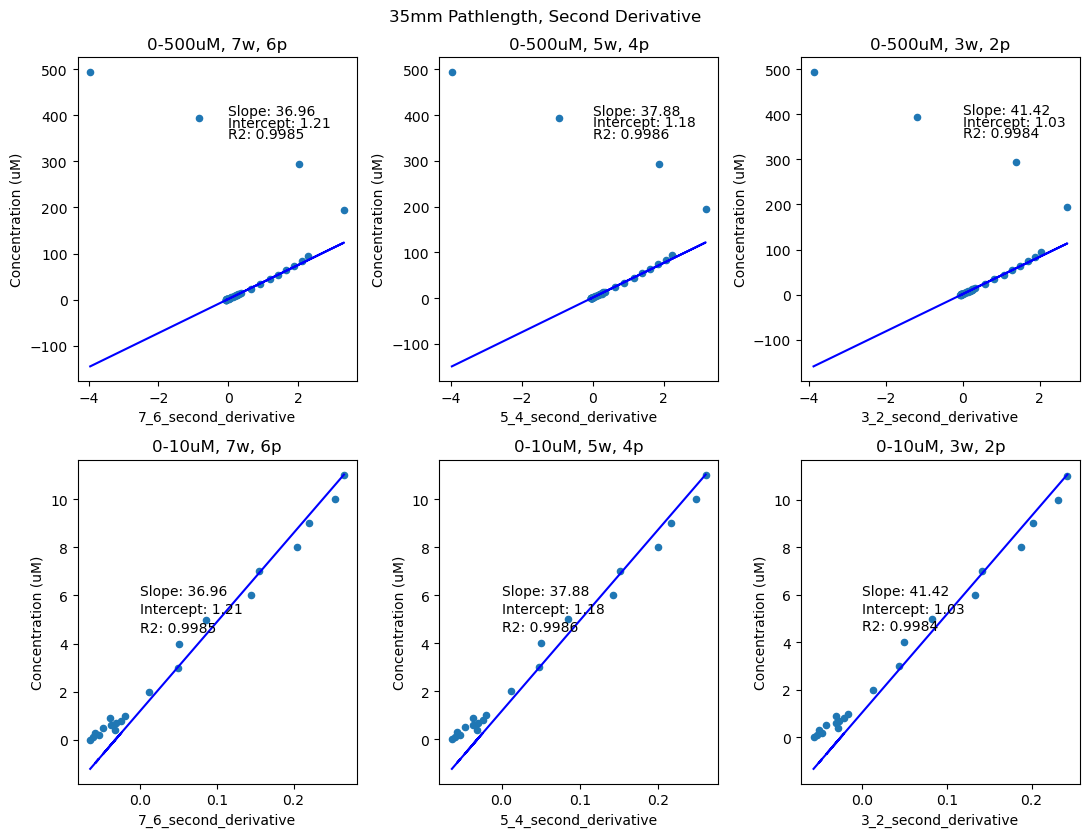

In [104]:
thirtyfive_mm_calibration.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(11,8.5), ncols=3, nrows=2)
thirtyfive_mm_calibration.plot(y="Concentration (uM)", x='7_6_second_derivative', kind='scatter', ax=ax[0,0], title= "0-500uM, 7w, 6p")
thirtyfive_mm_calibration.plot(y="Concentration (uM)", x='5_4_second_derivative', kind='scatter', ax=ax[0,1], title= "0-500uM, 5w, 4p")
thirtyfive_mm_calibration.plot(y="Concentration (uM)", x='3_2_second_derivative', kind='scatter', ax=ax[0,2], title= "0-500uM, 3w, 2p")
plot_linear_fit(thirtyfive_mm_calibration, thirtyfive_mm_calibration.loc[10:28], '7_6_second_derivative', 'Concentration (uM)', 0, 400, 25, ax[0,0])
plot_linear_fit(thirtyfive_mm_calibration, thirtyfive_mm_calibration.loc[10:28], '5_4_second_derivative', 'Concentration (uM)', 0, 400, 25, ax[0,1])
plot_linear_fit(thirtyfive_mm_calibration, thirtyfive_mm_calibration.loc[10:28], '3_2_second_derivative', 'Concentration (uM)', 0, 400, 25, ax[0,2])


thirtyfive_mm_calibration.loc[0:20].plot(y="Concentration (uM)", x='7_6_second_derivative', kind='scatter', ax=ax[1, 0], title = "0-10uM, 7w, 6p")
thirtyfive_mm_calibration.loc[0:20].plot(y="Concentration (uM)", x='5_4_second_derivative', kind='scatter', ax=ax[1, 1], title = "0-10uM, 5w, 4p")
thirtyfive_mm_calibration.loc[0:20].plot(y="Concentration (uM)", x='3_2_second_derivative', kind='scatter', ax=ax[1, 2], title = "0-10uM, 3w, 2p")
coeff_35mm, r2_35mm =plot_linear_fit(thirtyfive_mm_calibration.loc[0:20], thirtyfive_mm_calibration.loc[10:28], '7_6_second_derivative', 'Concentration (uM)', 0, 6, .75, ax[1,0])
coeff_35mm, r2_35mm =plot_linear_fit(thirtyfive_mm_calibration.loc[0:20], thirtyfive_mm_calibration.loc[10:28], '5_4_second_derivative', 'Concentration (uM)', 0, 6, .75, ax[1,1])
coeff_35mm, r2_35mm =plot_linear_fit(thirtyfive_mm_calibration.loc[0:20], thirtyfive_mm_calibration.loc[10:28], '3_2_second_derivative', 'Concentration (uM)', 0, 6, .75, ax[1,2])

fig.suptitle('35mm Pathlength, Second Derivative')
fig.tight_layout()


- linear from 1uM to 64uM
- similar fit quality to 220nm absorption
- each of the three windwos (7_6, 5_4, and 3_2) were very similar in fit quality

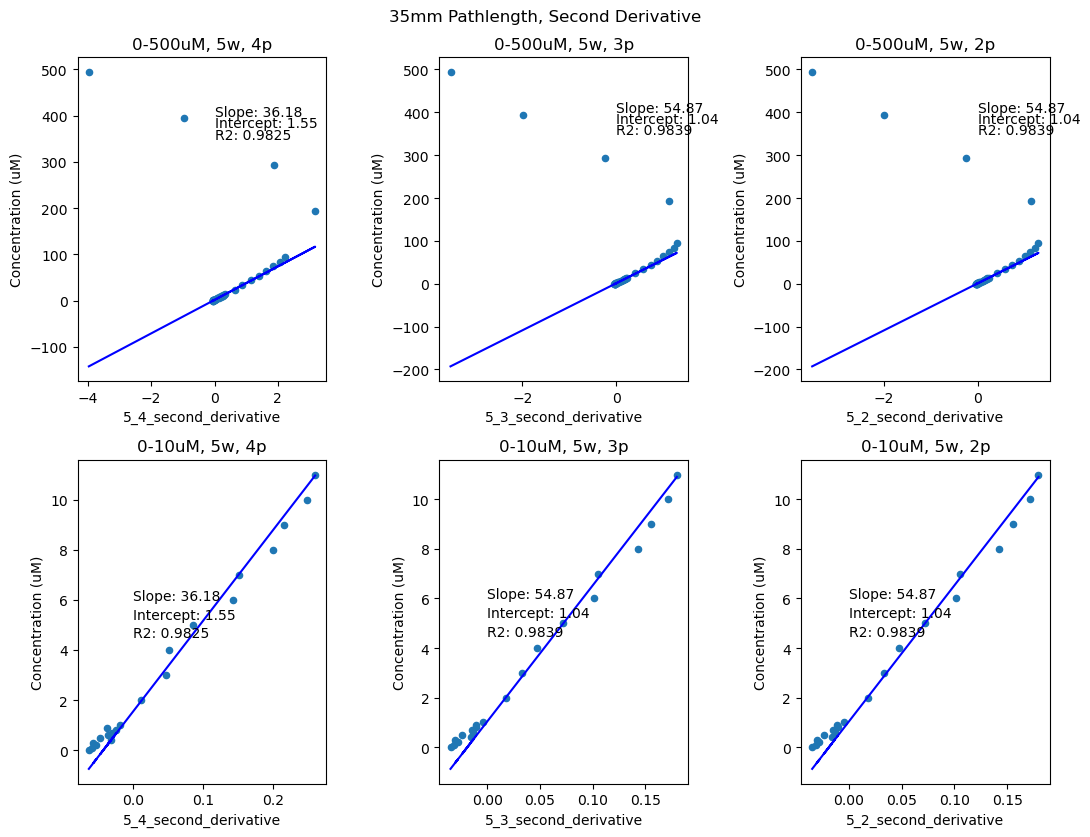

In [105]:
fig, ax = plt.subplots(figsize=(11,8.5), ncols=3, nrows=2)
thirtyfive_mm_calibration.plot(y="Concentration (uM)", x='5_4_second_derivative', kind='scatter', ax=ax[0,0], title= "0-500uM, 5w, 4p")
thirtyfive_mm_calibration.plot(y="Concentration (uM)", x='5_3_second_derivative', kind='scatter', ax=ax[0,1], title= "0-500uM, 5w, 3p")
thirtyfive_mm_calibration.plot(y="Concentration (uM)", x='5_2_second_derivative', kind='scatter', ax=ax[0,2], title= "0-500uM, 5w, 2p")
plot_linear_fit(thirtyfive_mm_calibration, thirtyfive_mm_calibration.loc[10:22], '5_4_second_derivative', 'Concentration (uM)', 0, 400, 25, ax[0,0])
plot_linear_fit(thirtyfive_mm_calibration, thirtyfive_mm_calibration.loc[10:22], '5_3_second_derivative', 'Concentration (uM)', 0, 400, 25, ax[0,1])
plot_linear_fit(thirtyfive_mm_calibration, thirtyfive_mm_calibration.loc[10:22], '5_2_second_derivative', 'Concentration (uM)', 0, 400, 25, ax[0,2])


thirtyfive_mm_calibration.loc[0:20].plot(y="Concentration (uM)", x='5_4_second_derivative', kind='scatter', ax=ax[1, 0], title = "0-10uM, 5w, 4p")
thirtyfive_mm_calibration.loc[0:20].plot(y="Concentration (uM)", x='5_3_second_derivative', kind='scatter', ax=ax[1, 1], title = "0-10uM, 5w, 3p")
thirtyfive_mm_calibration.loc[0:20].plot(y="Concentration (uM)", x='5_2_second_derivative', kind='scatter', ax=ax[1, 2], title = "0-10uM, 5w, 2p")
coeff_35mm, r2_35mm =plot_linear_fit(thirtyfive_mm_calibration.loc[0:20], thirtyfive_mm_calibration.loc[10:22], '5_4_second_derivative', 'Concentration (uM)', 0, 6, .75, ax[1,0])
coeff_35mm, r2_35mm =plot_linear_fit(thirtyfive_mm_calibration.loc[0:20], thirtyfive_mm_calibration.loc[10:22], '5_3_second_derivative', 'Concentration (uM)', 0, 6, .75, ax[1,1])
coeff_35mm, r2_35mm =plot_linear_fit(thirtyfive_mm_calibration.loc[0:20], thirtyfive_mm_calibration.loc[10:22], '5_2_second_derivative', 'Concentration (uM)', 0, 6, .75, ax[1,2])

fig.suptitle('35mm Pathlength, Second Derivative')
fig.tight_layout()

- so going from so using a 4th order polynomial with a window of 5 gives the best fit, 
- decreasing the polynomial order (increasing averaging) doesn't seem to give a better fit.
- will use 3_2 as our default setting for now since its simplest with these slopes and intercepts (41.42 and 1.03, respectively) for 35mm.

### 5mm

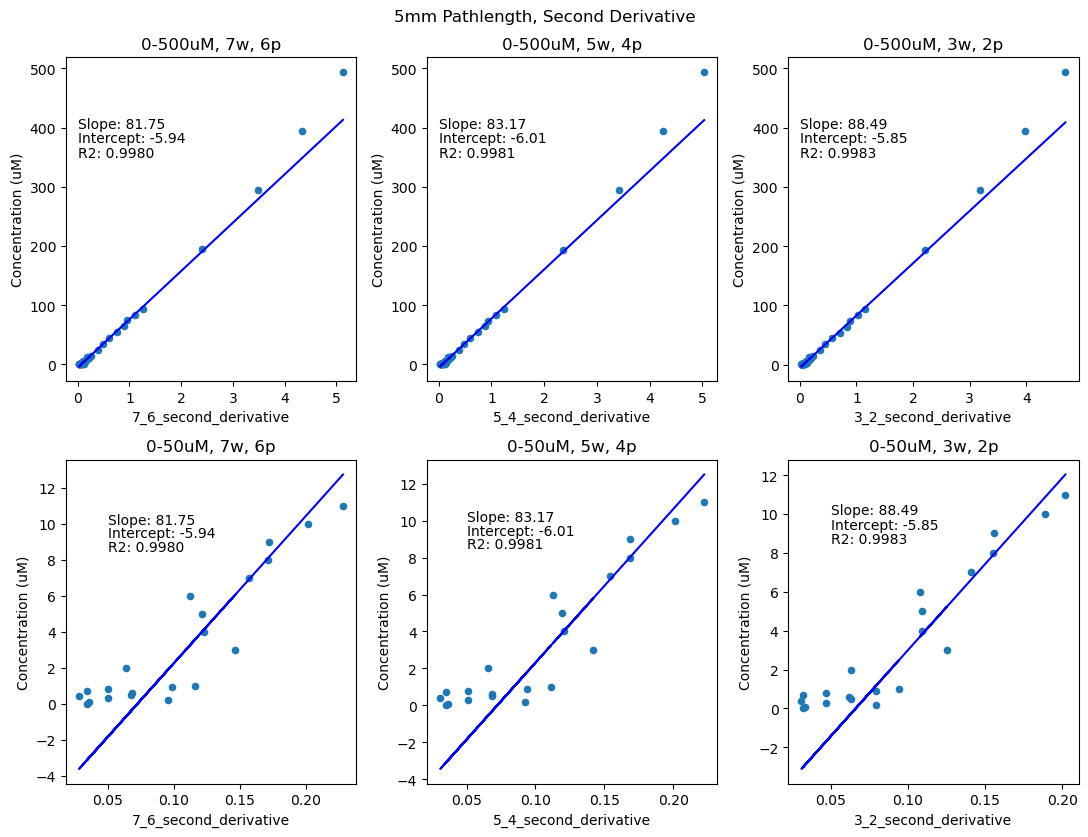

In [106]:
five_mm_calibration.reset_index(inplace=True)
fig2, ax2 = plt.subplots(figsize=(11,8.5), ncols=3, nrows=2)
five_mm_calibration.plot(y="Concentration (uM)", x='7_6_second_derivative', kind='scatter', ax=ax2[0,0], title= "0-500uM, 7w, 6p")
five_mm_calibration.plot(y="Concentration (uM)", x='5_4_second_derivative', kind='scatter', ax=ax2[0,1], title= "0-500uM, 5w, 4p")
five_mm_calibration.plot(y="Concentration (uM)", x='3_2_second_derivative', kind='scatter', ax=ax2[0,2], title= "0-500uM, 3w, 2p")
plot_linear_fit(five_mm_calibration, five_mm_calibration.loc[14:32], '7_6_second_derivative', 'Concentration (uM)', 0, 400, 25, ax2[0,0])
plot_linear_fit(five_mm_calibration, five_mm_calibration.loc[14:32], '5_4_second_derivative', 'Concentration (uM)', 0, 400, 25, ax2[0,1])
plot_linear_fit(five_mm_calibration, five_mm_calibration.loc[14:32], '3_2_second_derivative', 'Concentration (uM)', 0, 400, 25, ax2[0,2])


five_mm_calibration.loc[0:20].plot(y="Concentration (uM)", x='7_6_second_derivative', kind='scatter', ax=ax2[1, 0], title = "0-50uM, 7w, 6p")
five_mm_calibration.loc[0:20].plot(y="Concentration (uM)", x='5_4_second_derivative', kind='scatter', ax=ax2[1, 1], title = "0-50uM, 5w, 4p")
five_mm_calibration.loc[0:20].plot(y="Concentration (uM)", x='3_2_second_derivative', kind='scatter', ax=ax2[1, 2], title = "0-50uM, 3w, 2p")
coeff_5mm, r2_5mm =plot_linear_fit(five_mm_calibration.loc[0:20], five_mm_calibration.loc[14:32], '7_6_second_derivative', 'Concentration (uM)', 0.05, 10, .75, ax2[1,0])
coeff_5mm, r2_5mm =plot_linear_fit(five_mm_calibration.loc[0:20], five_mm_calibration.loc[14:32], '5_4_second_derivative', 'Concentration (uM)', 0.05, 10, .75, ax2[1,1])
coeff_5mm, r2_5mm =plot_linear_fit(five_mm_calibration.loc[0:20], five_mm_calibration.loc[14:32], '3_2_second_derivative', 'Concentration (uM)', 0.05, 10, .75, ax2[1,2])

fig2.suptitle('5mm Pathlength, Second Derivative')
fig2.tight_layout()

- linear from about 5uM to 200 uM
- considerably worse fits 0-10uM for 5mm 
    - could be due to bad spectra, but could also be due to short pathlength
- window of 3, polynomial of 2 fits best, but all three similar. will use 3w 2p since its the simplest, and also pretty good fit for 35mm


# Two Wavelength Calibration

In [119]:
thirtyfive_mm_calibration = no3_calibrations.two_wavelength(thirtyfive_mm_calibration, output_calibrated=False)
five_mm_calibration = no3_calibrations.two_wavelength(five_mm_calibration, output_calibrated=False,)

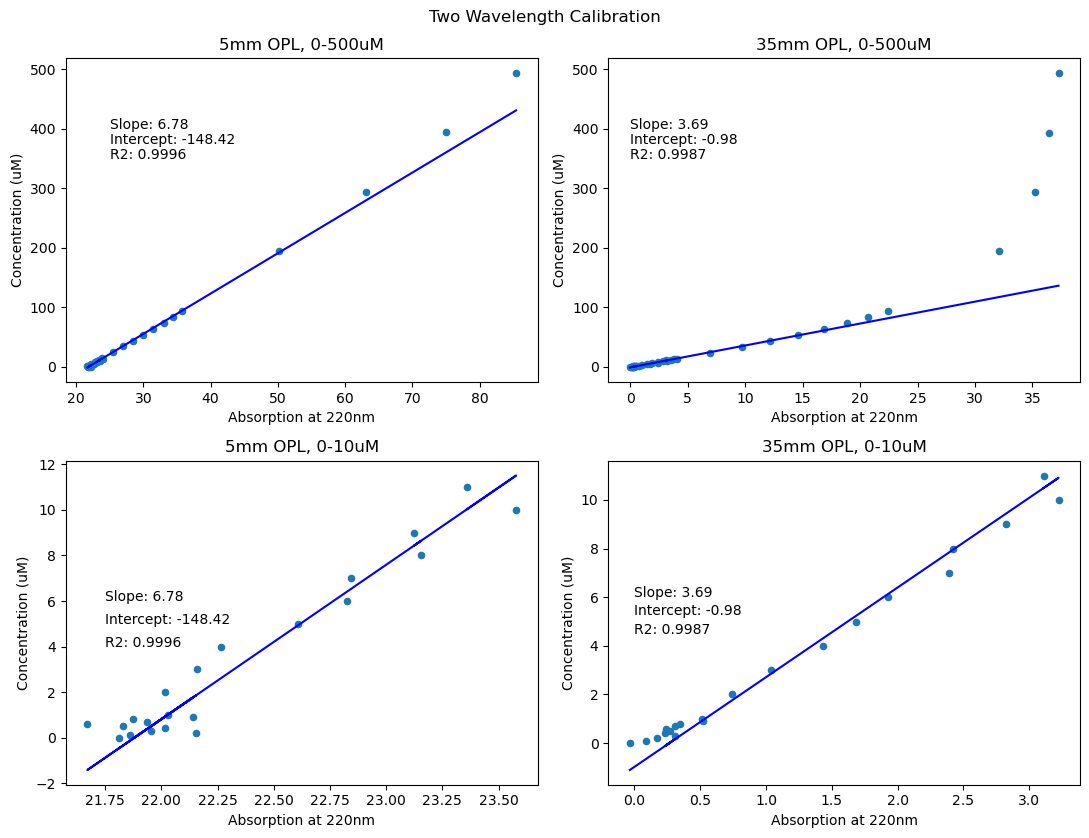

In [120]:
fig3, ax3 = plt.subplots(figsize=(11,8.5), ncols=2, nrows=2)
five_mm_calibration.plot(y="Concentration (uM)", x='two_wavelength', kind='scatter', ax=ax3[0,0], title= "5mm OPL, 0-500uM")
thirtyfive_mm_calibration.plot(y="Concentration (uM)", x='two_wavelength', kind='scatter', ax=ax3[0, 1], title = "35mm OPL, 0-500uM")
plot_linear_fit(five_mm_calibration, five_mm_calibration.loc[11:32], 'two_wavelength', 'Concentration (uM)', 25, 400, 25, ax3[0,0])
plot_linear_fit(thirtyfive_mm_calibration, thirtyfive_mm_calibration.loc[5:27], 'two_wavelength', 'Concentration (uM)', 0, 400, 25, ax3[0,1])


five_mm_calibration.loc[0:20].plot(y="Concentration (uM)", x='two_wavelength', kind='scatter', ax=ax3[1,0], title= "5mm OPL, 0-10uM")
thirtyfive_mm_calibration.loc[0:20].plot(y="Concentration (uM)", x='two_wavelength', kind='scatter', ax=ax3[1, 1], title = "35mm OPL, 0-10uM")

coeff_5mm, r2_5mm = plot_linear_fit(five_mm_calibration.loc[0:20], five_mm_calibration.loc[11:32], 'two_wavelength', 'Concentration (uM)', 21.75, 6, 1, ax3[1,0])
coeff_35mm, r2_35mm =plot_linear_fit(thirtyfive_mm_calibration.loc[0:20], thirtyfive_mm_calibration.loc[5:27], 'two_wavelength', 'Concentration (uM)', 0, 6, .75, ax3[1,1])

for ax3 in ax3.flatten():
    ax3.set_xlabel("Absorption at 220nm")

fig3.suptitle('Two Wavelength Calibration')
fig3.tight_layout()


- 5mm is linear from 2 uM to 200 uM
- 35mm is linear from .5 uM to 50 uM


- will use these slopes and intercepts:
    - slope 6.78, intercept -148.42 for 5mm
    - slope 3.69, intercept -.98 for 35mm

# Checking Spectra of 5mm and 35mm S-CAN

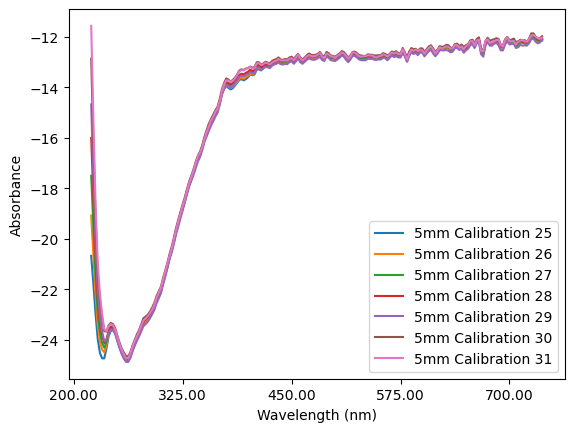

In [113]:
scan_helpers.plot_scan_fp(five_mm_calibration.drop(["Concentration (uM)",'two_wavelength', '7_6_second_derivative', '5_4_second_derivative', '3_2_second_derivative'], axis=1),range(25,32), label= [f"5mm Calibration {i}" for i in range(25,32)])

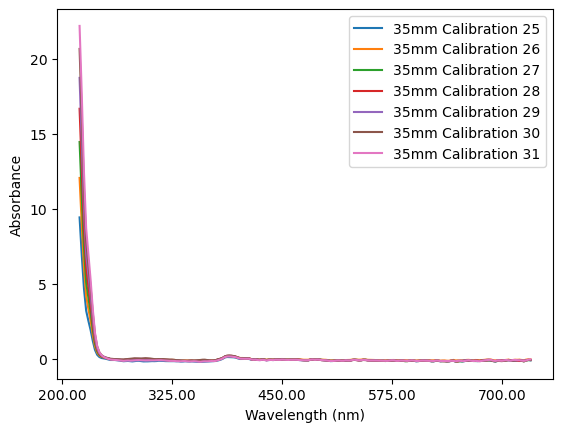

In [116]:
scan_helpers.plot_scan_fp(thirtyfive_mm_calibration.drop(["Concentration (uM)",'two_wavelength', '7_6_second_derivative', '5_4_second_derivative', '3_2_second_derivative', '5_3_second_derivative', '5_2_second_derivative'], axis=1),range(25,32), label= [f"35mm Calibration {i}" for i in range(25,32)])

- sure looks like the reference on the 5mm S-CAN isn't set to have all negative absorbance values